# Problem Statement
* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.
* Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.

# 1] Business Case
* Cell phone price prediction offers significant advantages to businesses in the mobile device industry. By utilizing data-driven insights and machine learning algorithms, businesses can optimize pricing strategies, forecast demand, manage inventory efficiently, and enhance their market positioning. Price prediction analysis empowers businesses to make informed decisions, drive revenue growth, and establish a competitive advantage in the ever-evolving cell phone market.

# 2] Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('mobile.csv.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Domain Analysis
* ---->The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.
* ----->price range in continuous data (target variable).
          0 = 500 to 5000 (low price)
          1 = 5000 to 20000 (medium price)
          2 = 20000 to 50000 ( high price)
          3 = 50000 above (very high price)
* 1.Battery power:
The capacity of a battery is measured in milliampere-hours (or mAh), which indicates how much energy the battery can deliver over time.There are three different types of batteries that are commonly used - Alkaline, Nickel Metal Hydride (NiMH), and Lithium Ion.Mostly used in Both lithium-ion and lithium-poly batteries are suitable with high and robust power usages. However, lithium-ion batteries are more efficient and popular than lithium-polymer. They have higher energy levels and powers and are more suitable for heavy usages.
* 2.Bluetooth : 
Has bluetooth or not.Uses of bluetooth to share documents or to connect with other Bluetooth-enabled devices.Voice and data sharing Bluetooth level will allow compatible devices to share data and voice communication.
* 3.clock speed :
The clock speed determines the amount of instructions that can be executed per second. The higher the clock speed, the faster the smartphone.Clock speed is the number of cycles executed by a CPU in a second.
* 4.Duel Sim :
Has dual sim support or not.Dual SIM models allow you to use two SIM cards in one device. This is handy if you have separate phone numbers for work and home or if you would like to use a local number while keeping your original number active when in a foreign country.
* 5.Front Camera : 
Front Camera mega pixels,For most everyday camera use, a quality 6-megapixel camera is sufficient. Opt for greater megapixels if you want to utilise your photos for massive hoardings or canvas-sized prints.A front-facing camera, commonly known as a selfie camera, is a common feature of cameras, mobile phones, smartphones, tablets, laptops, and some handheld video game consoles.
* 6.4G,4th generation : 
Has 4G supported or not.Like 3G, 4G is a protocol that sends and receives data in packets. However, 4G differs from 3G in how it works. 4G is entirely IP based, which means it uses internet protocols even for voice data.
* 7.Internal Memory :
Internal memory is the manufacturer-installed storage space, usually 16, 32 or 64GB, where the operating system, pre-installed apps, and other system software is installed.
* 8.Mobile Depth : 
Mobile depth Average phones: 5.8 to 6.2 inches(14.7 to 15.7cm)
* 9.Mobile Weight: 
Weights of Mobile phones,Typically, a weight between 150 to 200 grams is considered lightweight, while a weight between 200 to 300 grams is considered to be of average weight. A weight over 300 grams is considered heavy.
* 10.N_cores :
As a general rule, octa-core refers to a device with 8 cores; quad-core, to one with 4 cores; hexa-core is 6 cores, and dual-core is only 2 cores. The most common is to see phones with at least 4 cores, due to the great relationship between price and performance.
* 11.Primary Camera :
One of them is the primary lens that does all the major lifting while the secondary lens works on capturing additional light, increasing the field of view or helps with a nice background blur.
* 12.Px_height:
Pixel Resolution Height.The pixel resolution for high definition screens is 1920 x 1080. Quarter high definition screens have a 960 x 540 pixel resolution.Common mobile screen resolutions include: 480×800, 640×1136, 720×1280, 750×1334, 1080×1920, and 1440×2560. The most common resolution is 720x1280
* 13.Px_width:
Pixel Resolution Width.Most mobile phones have a device-width of 480px or lower, including the popular iPhone 4 (with device-width: 320px), despite it technically having a 640 x 960 resolution
* 14.RAM:
Random acess Memory.Phone memory refers to RAM (Random Access Memory). RAM is the part of the phone that is used to store the operating system (OS) and where apps and data currently in use are kept. Whereas, phone storage is used to store data such as apps, photos, videos, and files that are necessary for the phone to run.
* 15.Screen Height:
Screen Height of mobile in cm.Average phones: 5.8 to 6.2 inches (14.7 to 15.7cm),An average phone can feel quite large, depending on the size of your hands.
* 16.Screen Width:
Screen Width of mobile in cm.Most mobile phones have a device-width of 480px or lower, including the popular iPhone 4 (with device-width: 320px), despite it technically having a 640 x 960 resolution.
* 17.Talk Time:
longest time that a single battery charge will last when you are,Something around 4000-7000mAh is what you'll find in most phones nowadays, give or take. In previous generations of phones, 5-7 hours of use might zap your battery. But newer phones should, at the very least, get you through the day without having to charge it up (with normal usage) often stretching past 8-10 hours.
* 18.3G : 
Third Generation,Has 3G or not,The third generation of cellular technology, which enables mobile telecommunications, is referred to as 3G. The third-generation standard was introduced after two others that were used by mobile networks and phones. It is a form of wireless communication that enables faster data transmission rates than earlier iterations of mobile technology.
* 19.Touch_screen :
Has touch screen or not.A touchscreen or touch screen is the assembly of both an input ('touch panel') and output ('display') device. The touch panel is normally layered on the top of an electronic visual display of an information processing system. The display is often an LCD AMOLED or OLED display while the system is usually a laptop, tablet, or smartphone.
* 20.Wifi :
Has wifi or not.To use Wi-Fi the way you want, you can change how and when your phone connects. When you have Wi-Fi turned on, your phone automatically connects to nearby Wi-Fi networks you've connected to before.
* 21.Price Range:
This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# 3] basic checks

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [15]:
# renaming the columns for better understanding
data.rename({'blue':'bluetooth','fc':'front_camera','int_memory':'internal_memory','m_dep':'mobile_depth','mobile_wt':'mobile_weight','pc':'primary_camera','px_height':'pixelresolutionheight','px_width':'pixelresolutionwidth','sc_h':'screen_height','sc_w':'screen'
       },axis=1 ,inplace=True) ## Rename the columns names

In [16]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,...,pixelresolutionheight,pixelresolutionwidth,ram,screen_height,screen,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# 4] EDA

### 1} Univarient Analysis

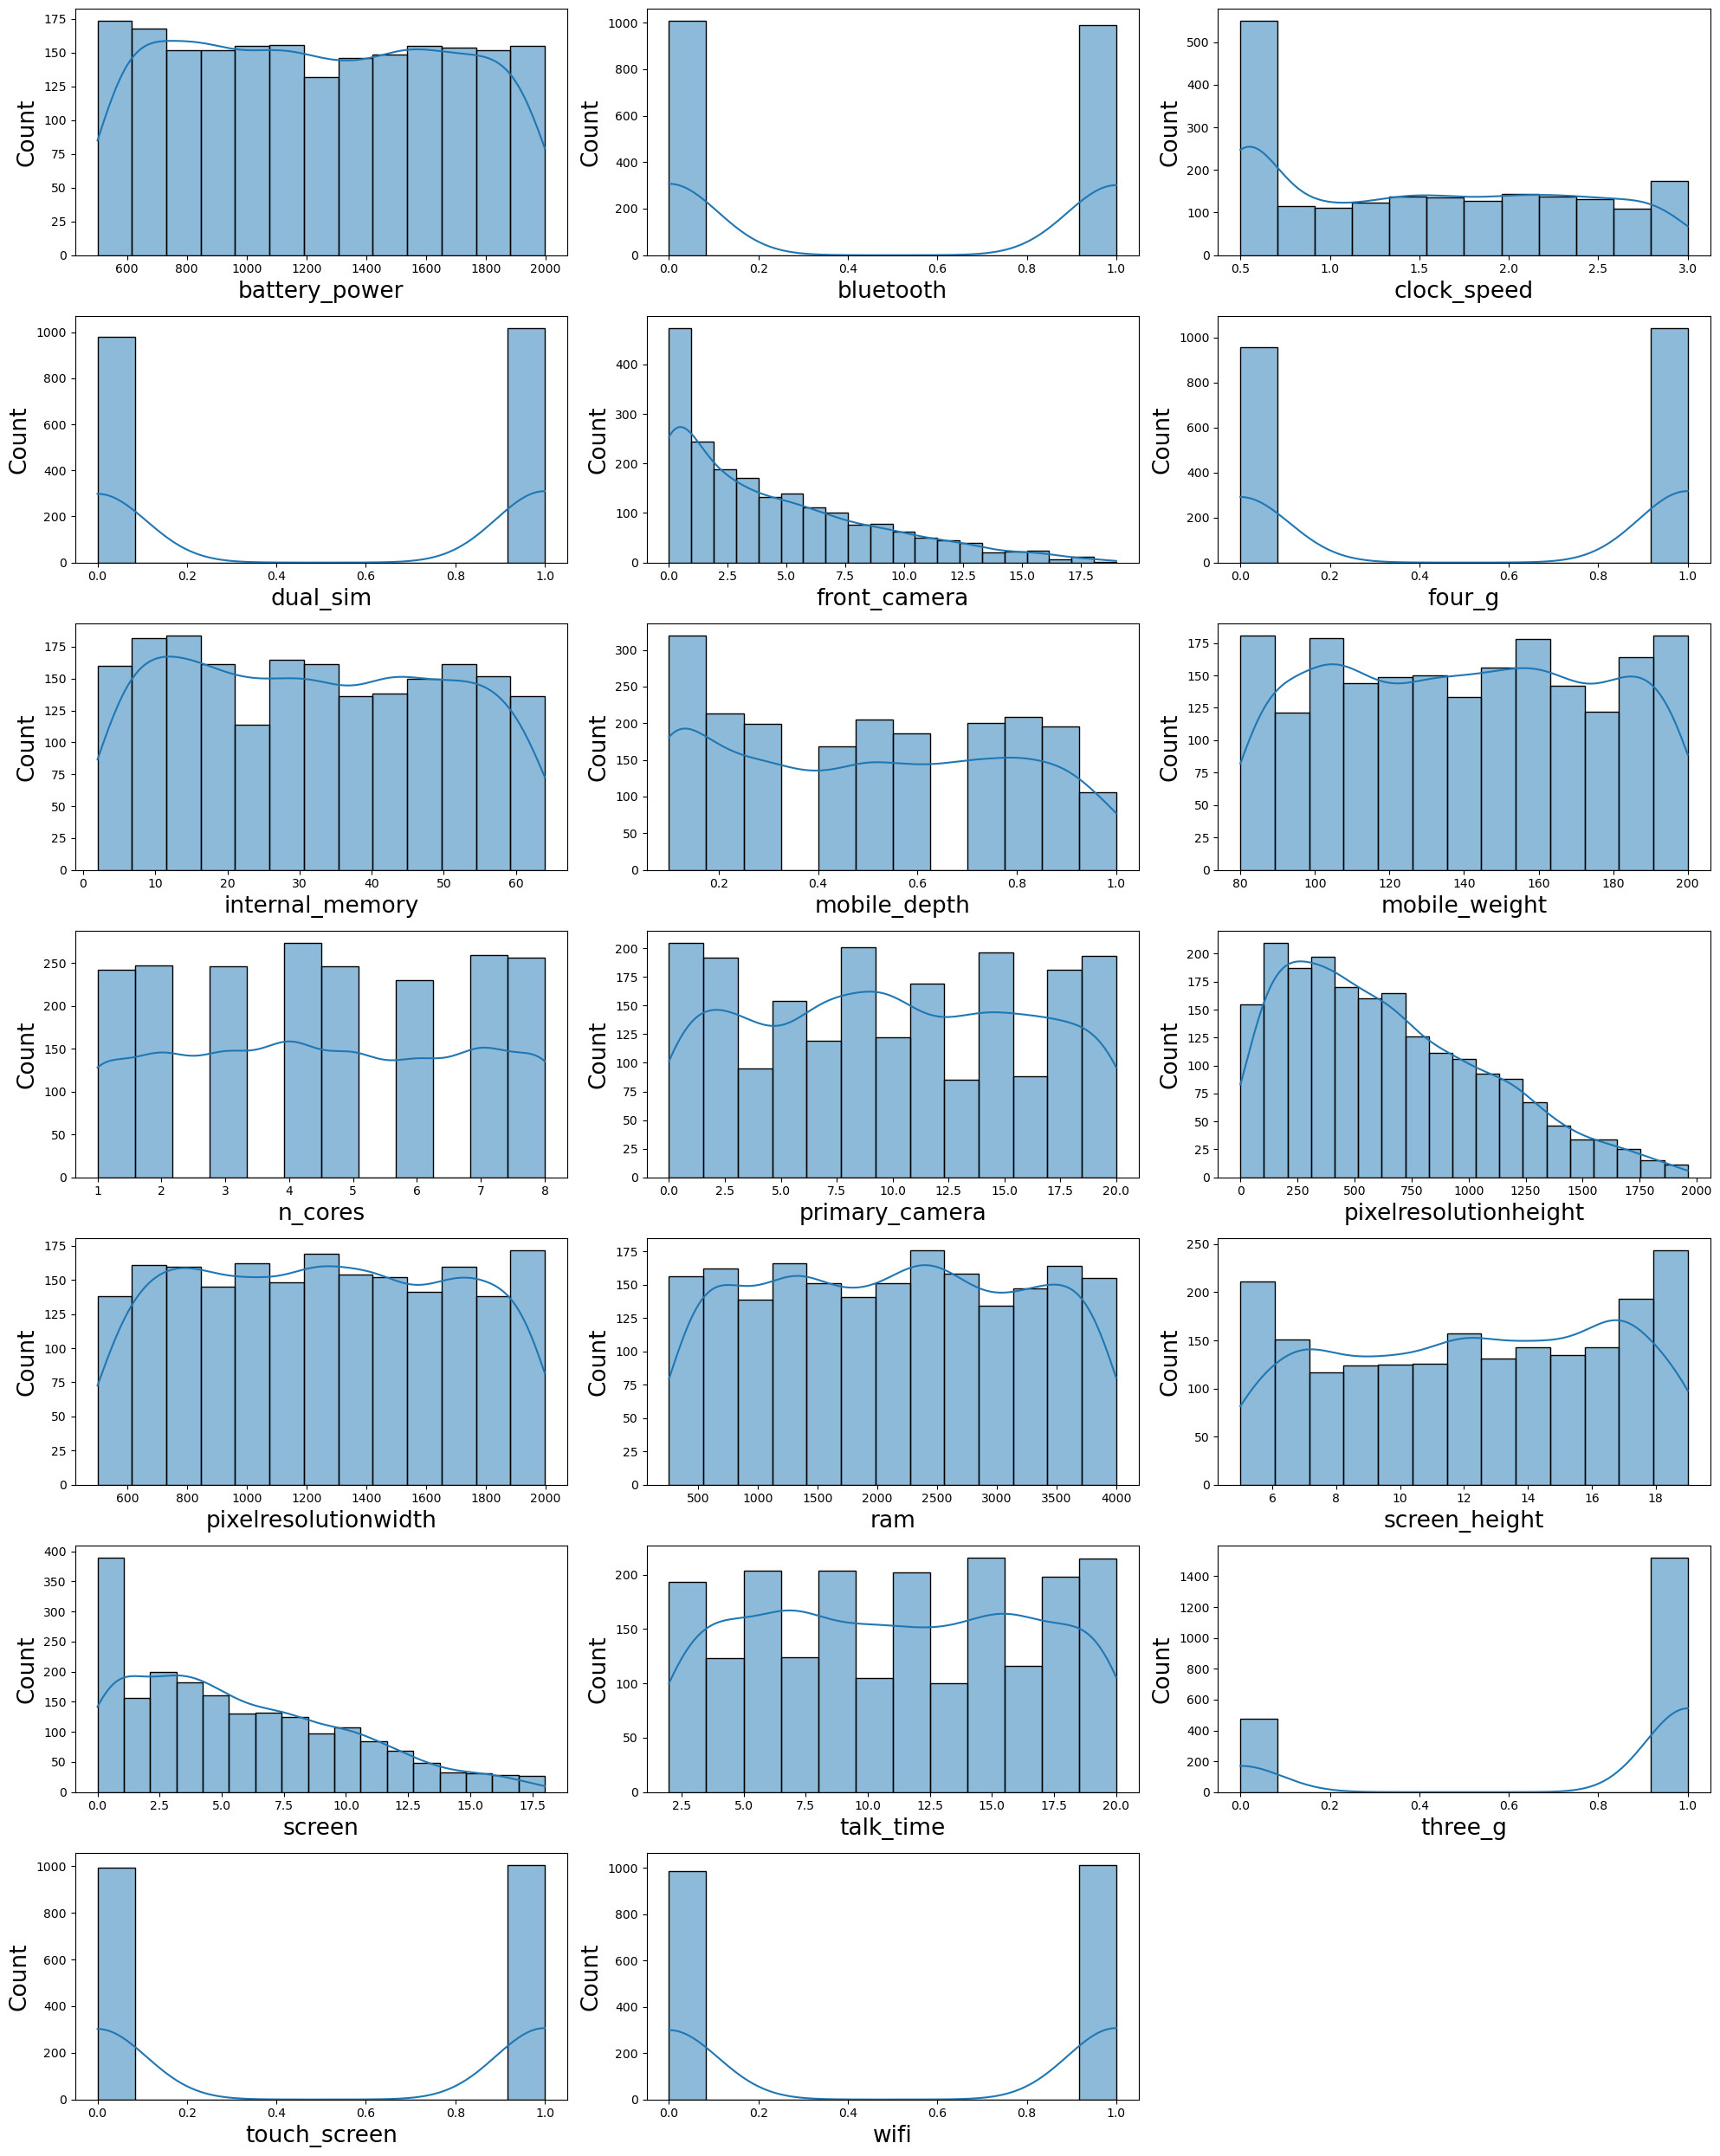

In [18]:
plt.figure(figsize=(20,25))
plotnum=1
for col in data.drop(['price_range'],axis=1):
    plt.subplot(7,3,plotnum)
    sns.histplot(data[col],kde=True)
    plt.xlabel(col,fontsize=19)
    plt.ylabel('Count',fontsize=19)
    plotnum+=1
plt.tight_layout()

### 2} Bivarient Analysis

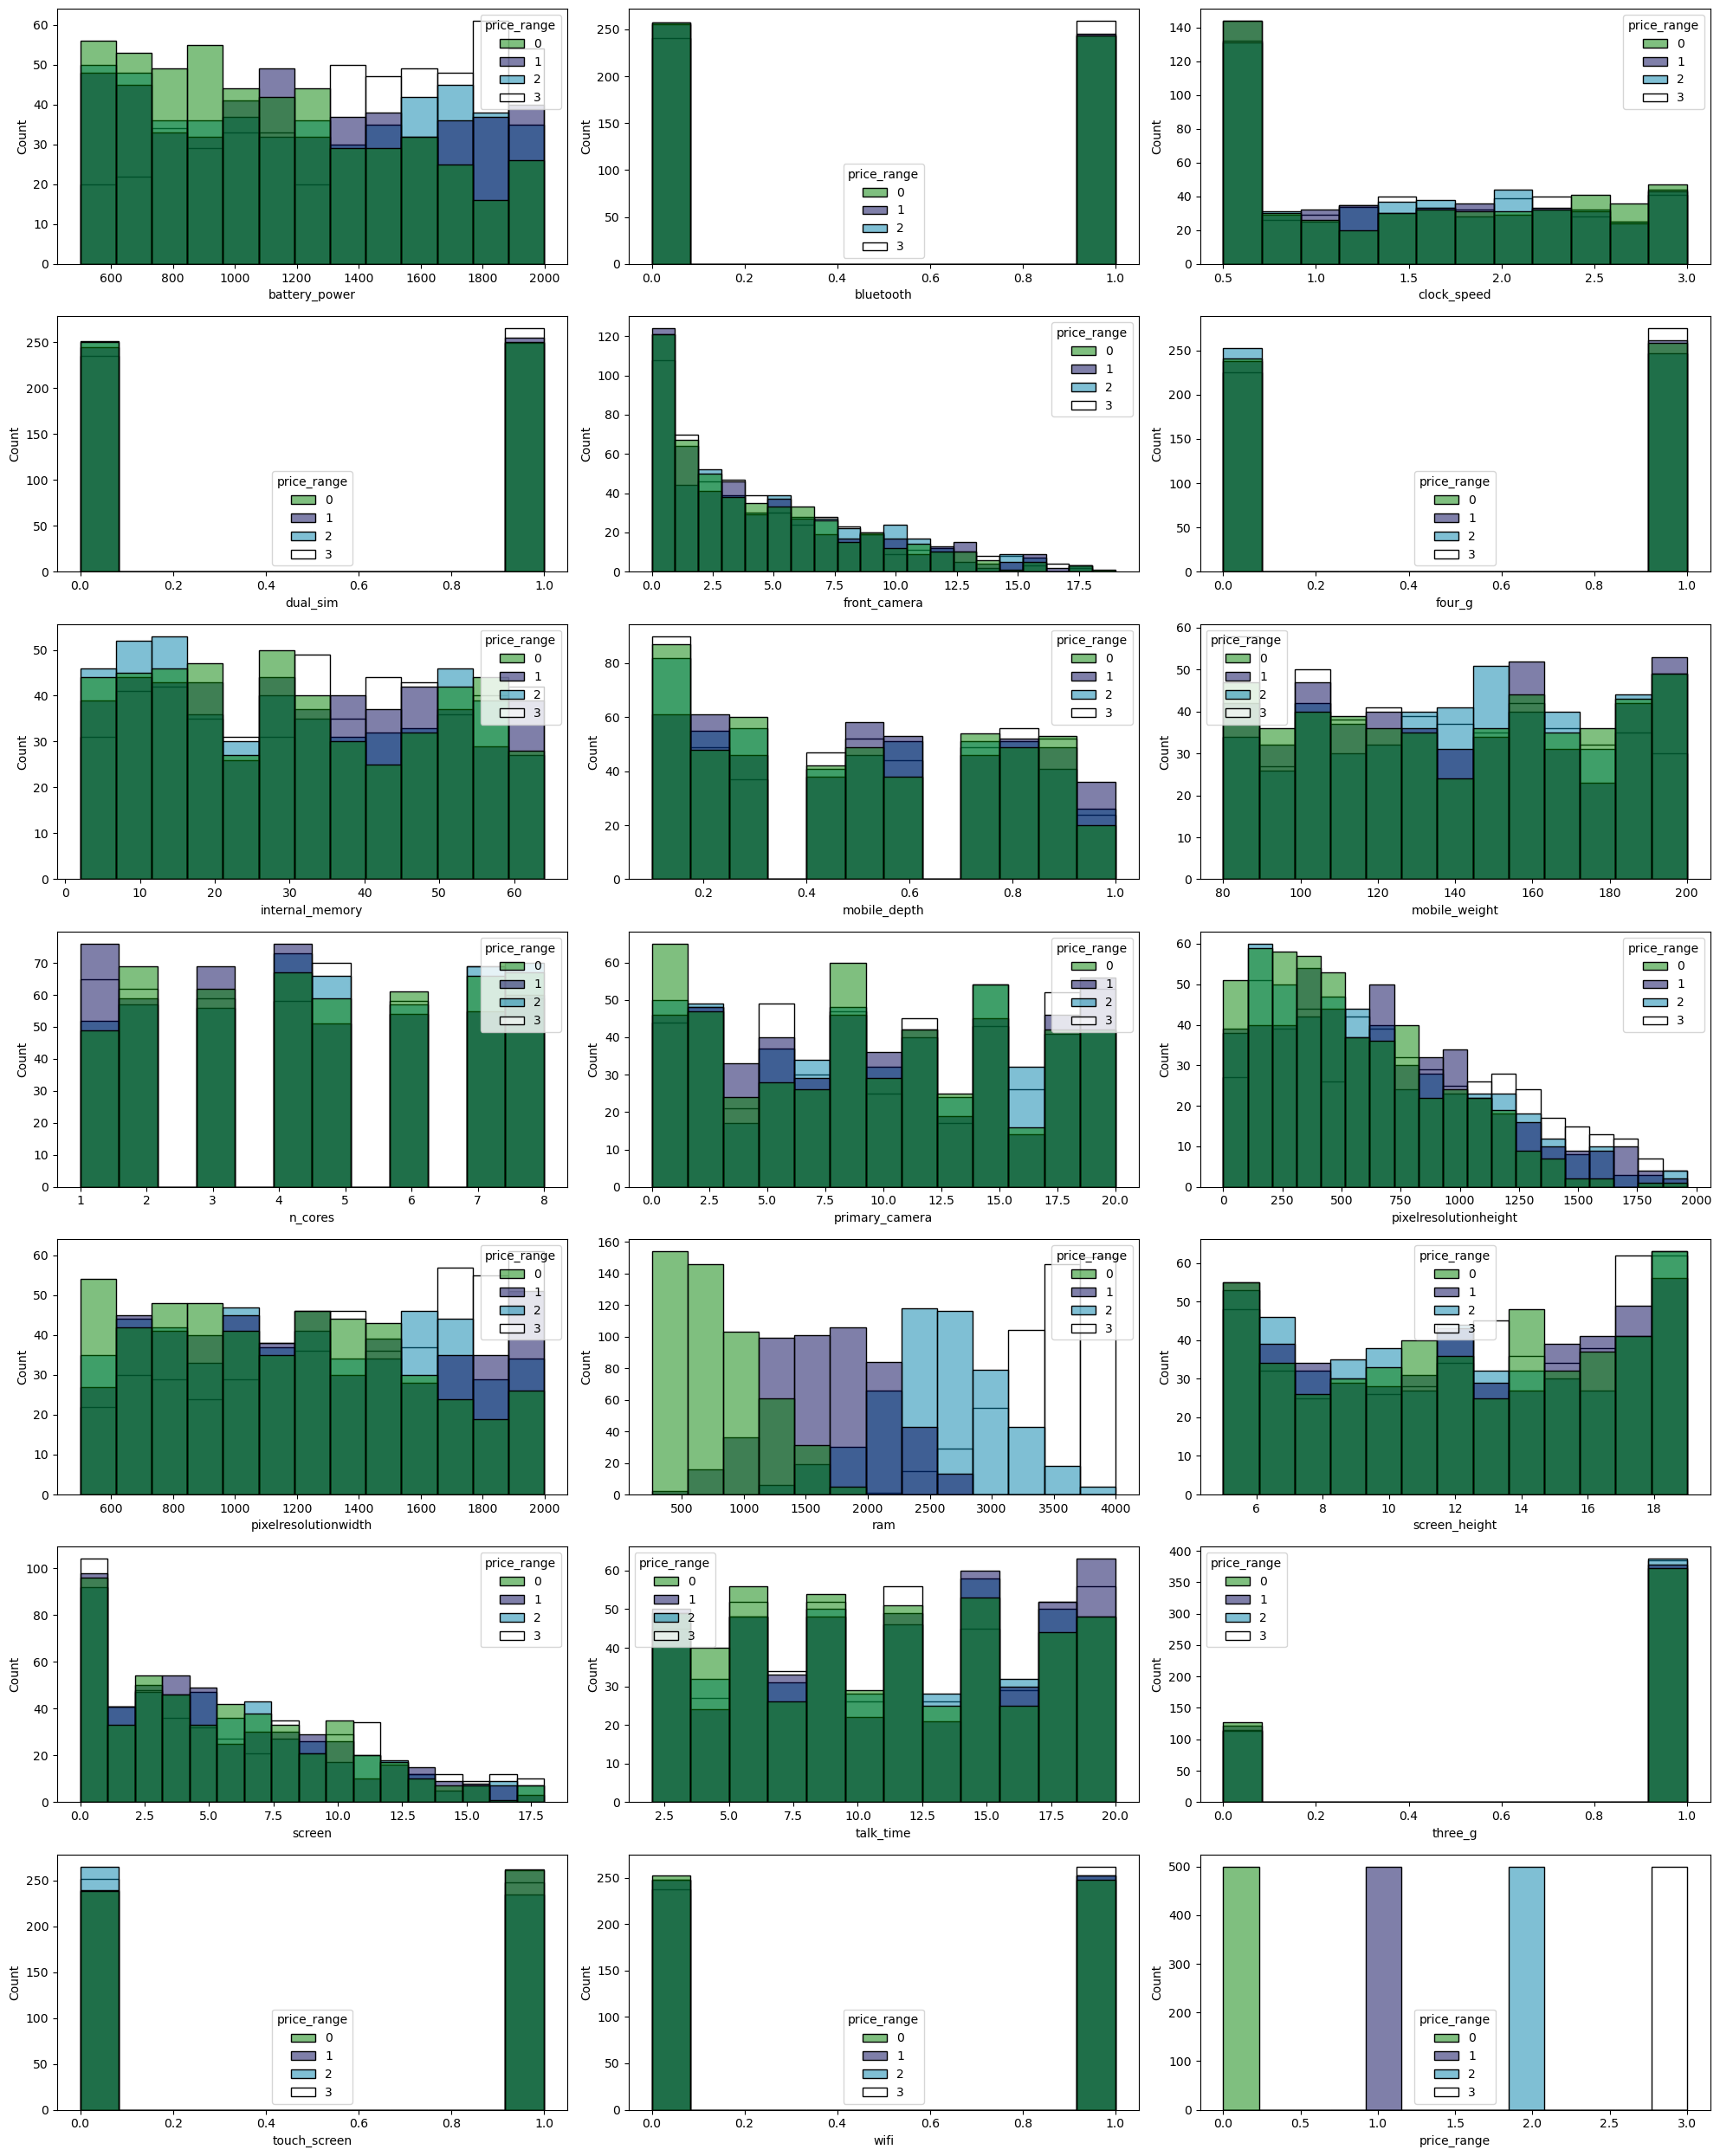

In [23]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in data:
    plt.subplot(7,3,plotnumber)
    sns.histplot(x=data[i],hue='price_range',data=data,palette='ocean')
    plotnumber=plotnumber+1
plt.tight_layout()

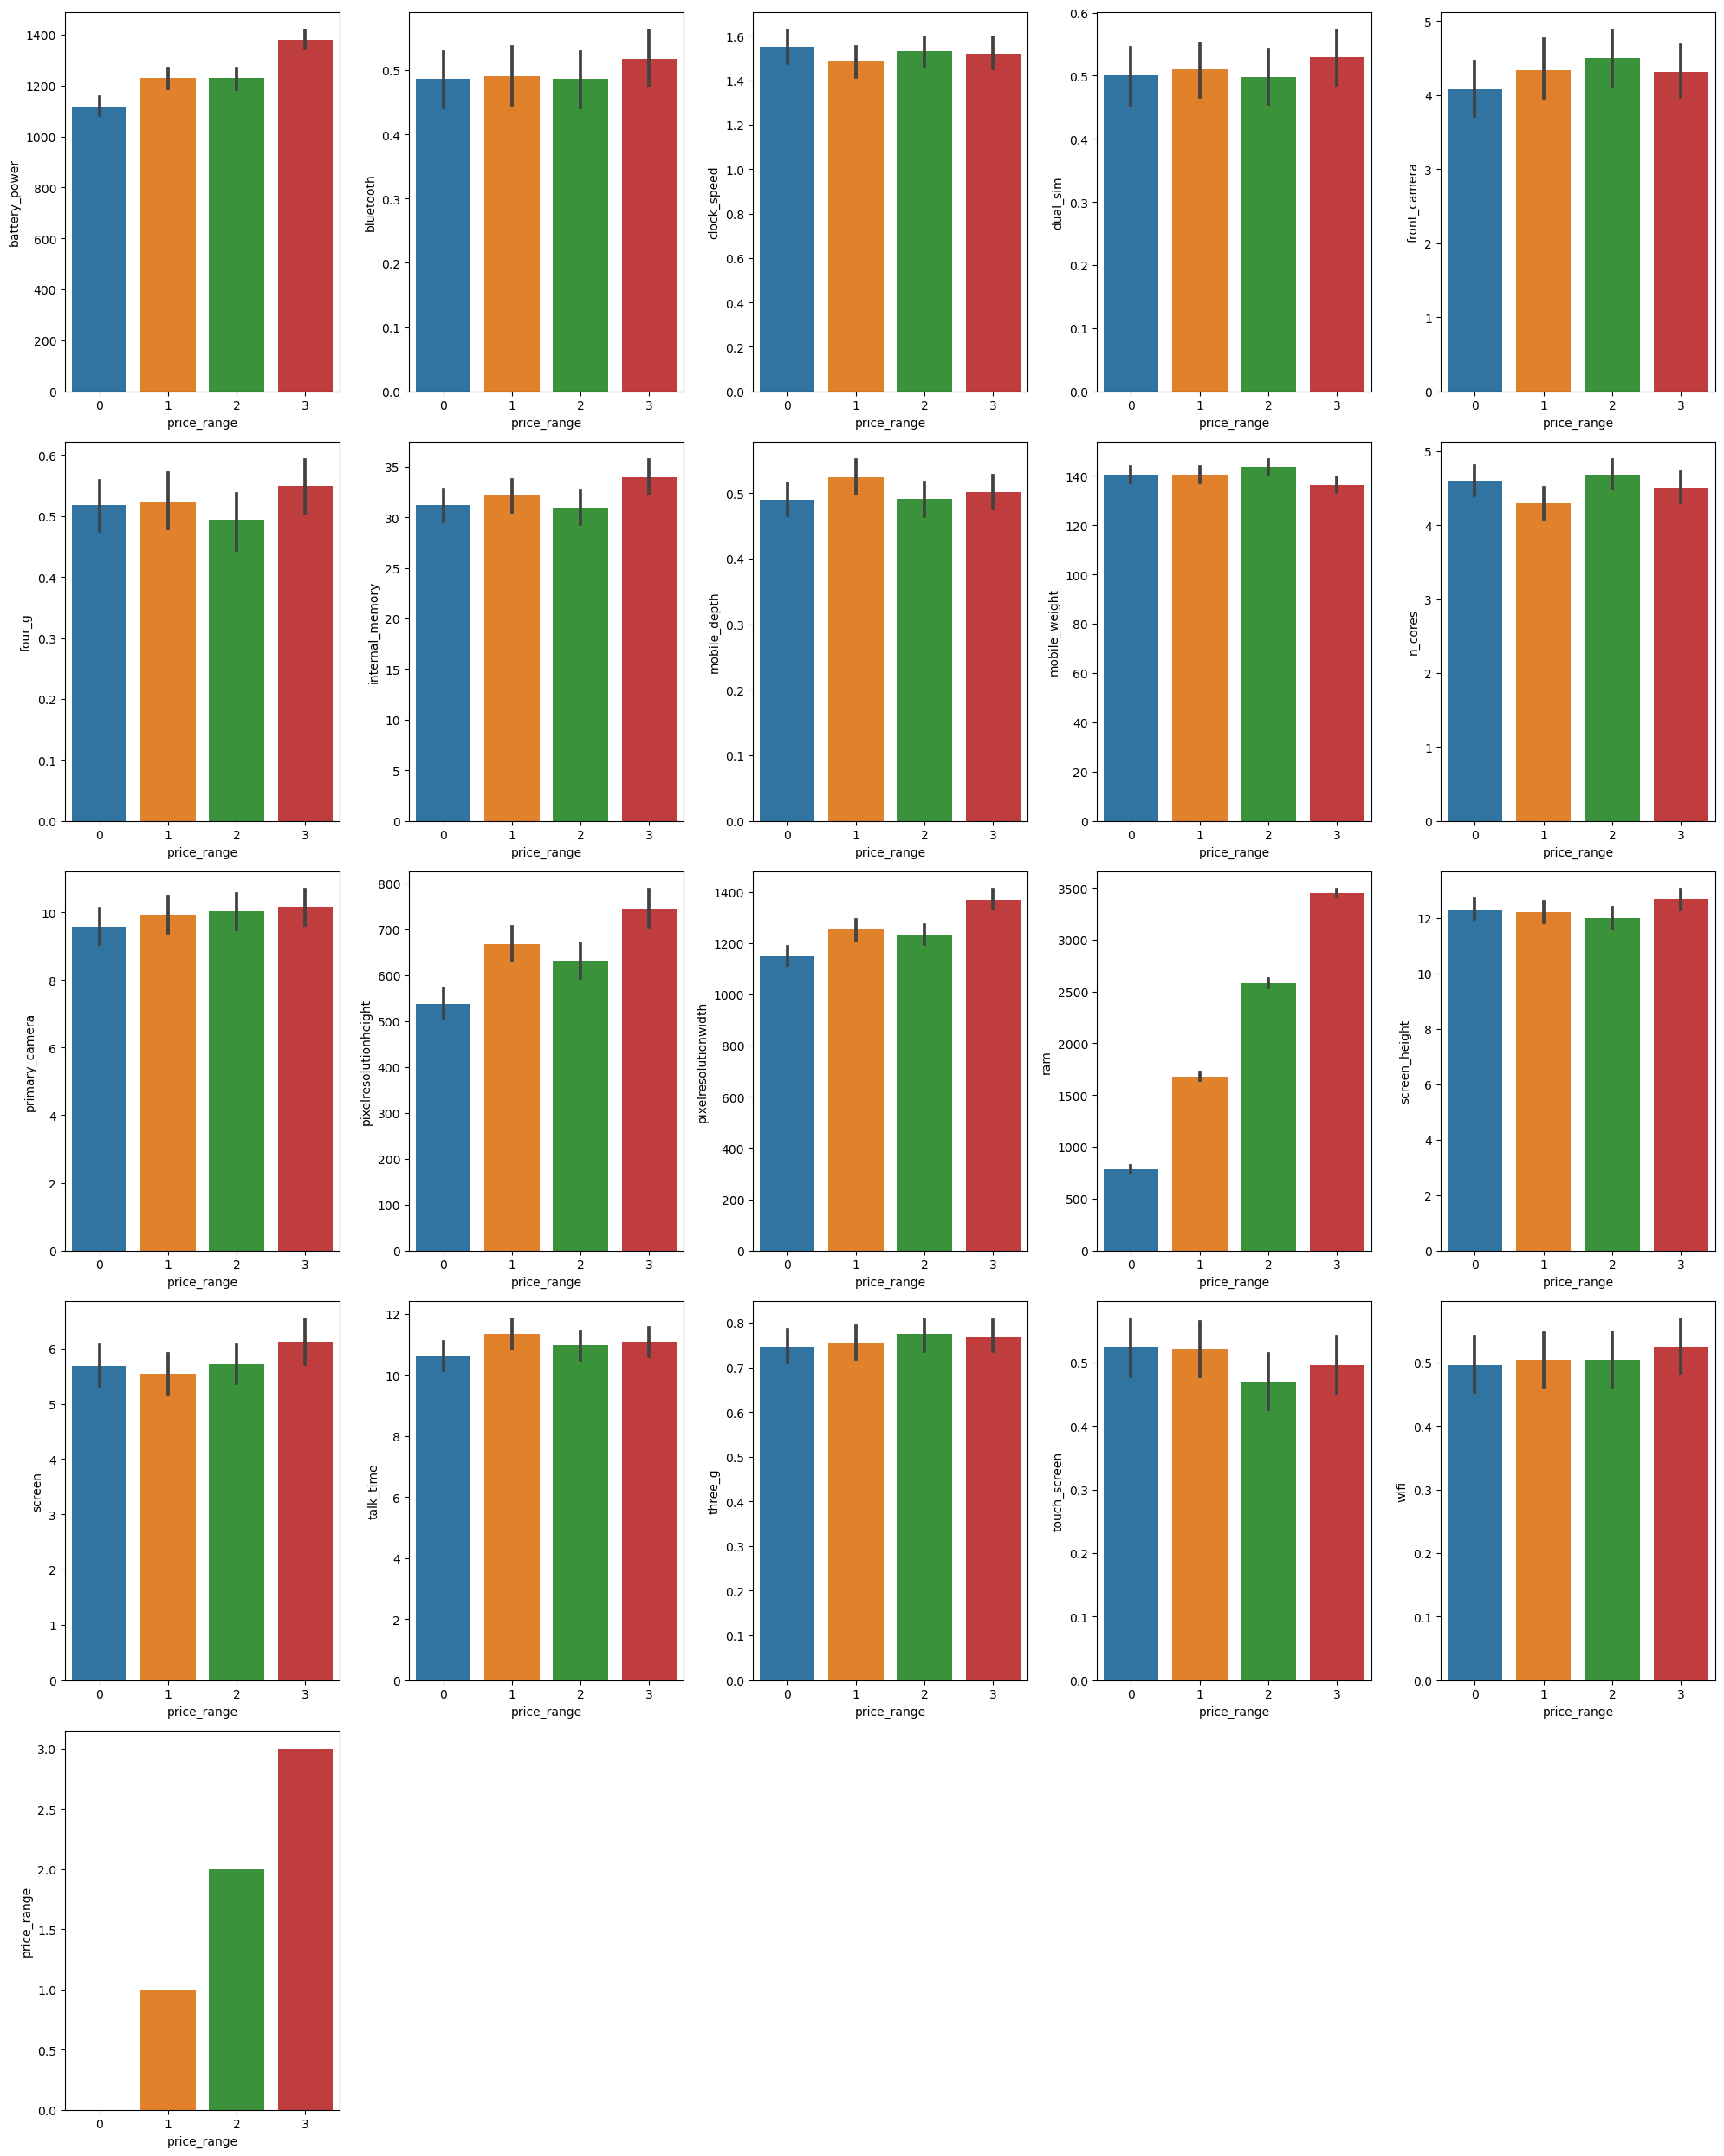

In [25]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in data:
    plt.subplot(5,5,plotnumber)
    sns.barplot(x='price_range',y=data[i],data=data)
    plotnumber=plotnumber+1
plt.tight_layout()

# 5] Data Preprocessing

In [26]:
data.isnull().sum()

battery_power            0
bluetooth                0
clock_speed              0
dual_sim                 0
front_camera             0
four_g                   0
internal_memory          0
mobile_depth             0
mobile_weight            0
n_cores                  0
primary_camera           0
pixelresolutionheight    0
pixelresolutionwidth     0
ram                      0
screen_height            0
screen                   0
talk_time                0
three_g                  0
touch_screen             0
wifi                     0
price_range              0
dtype: int64

In [28]:
data.duplicated().sum()

0

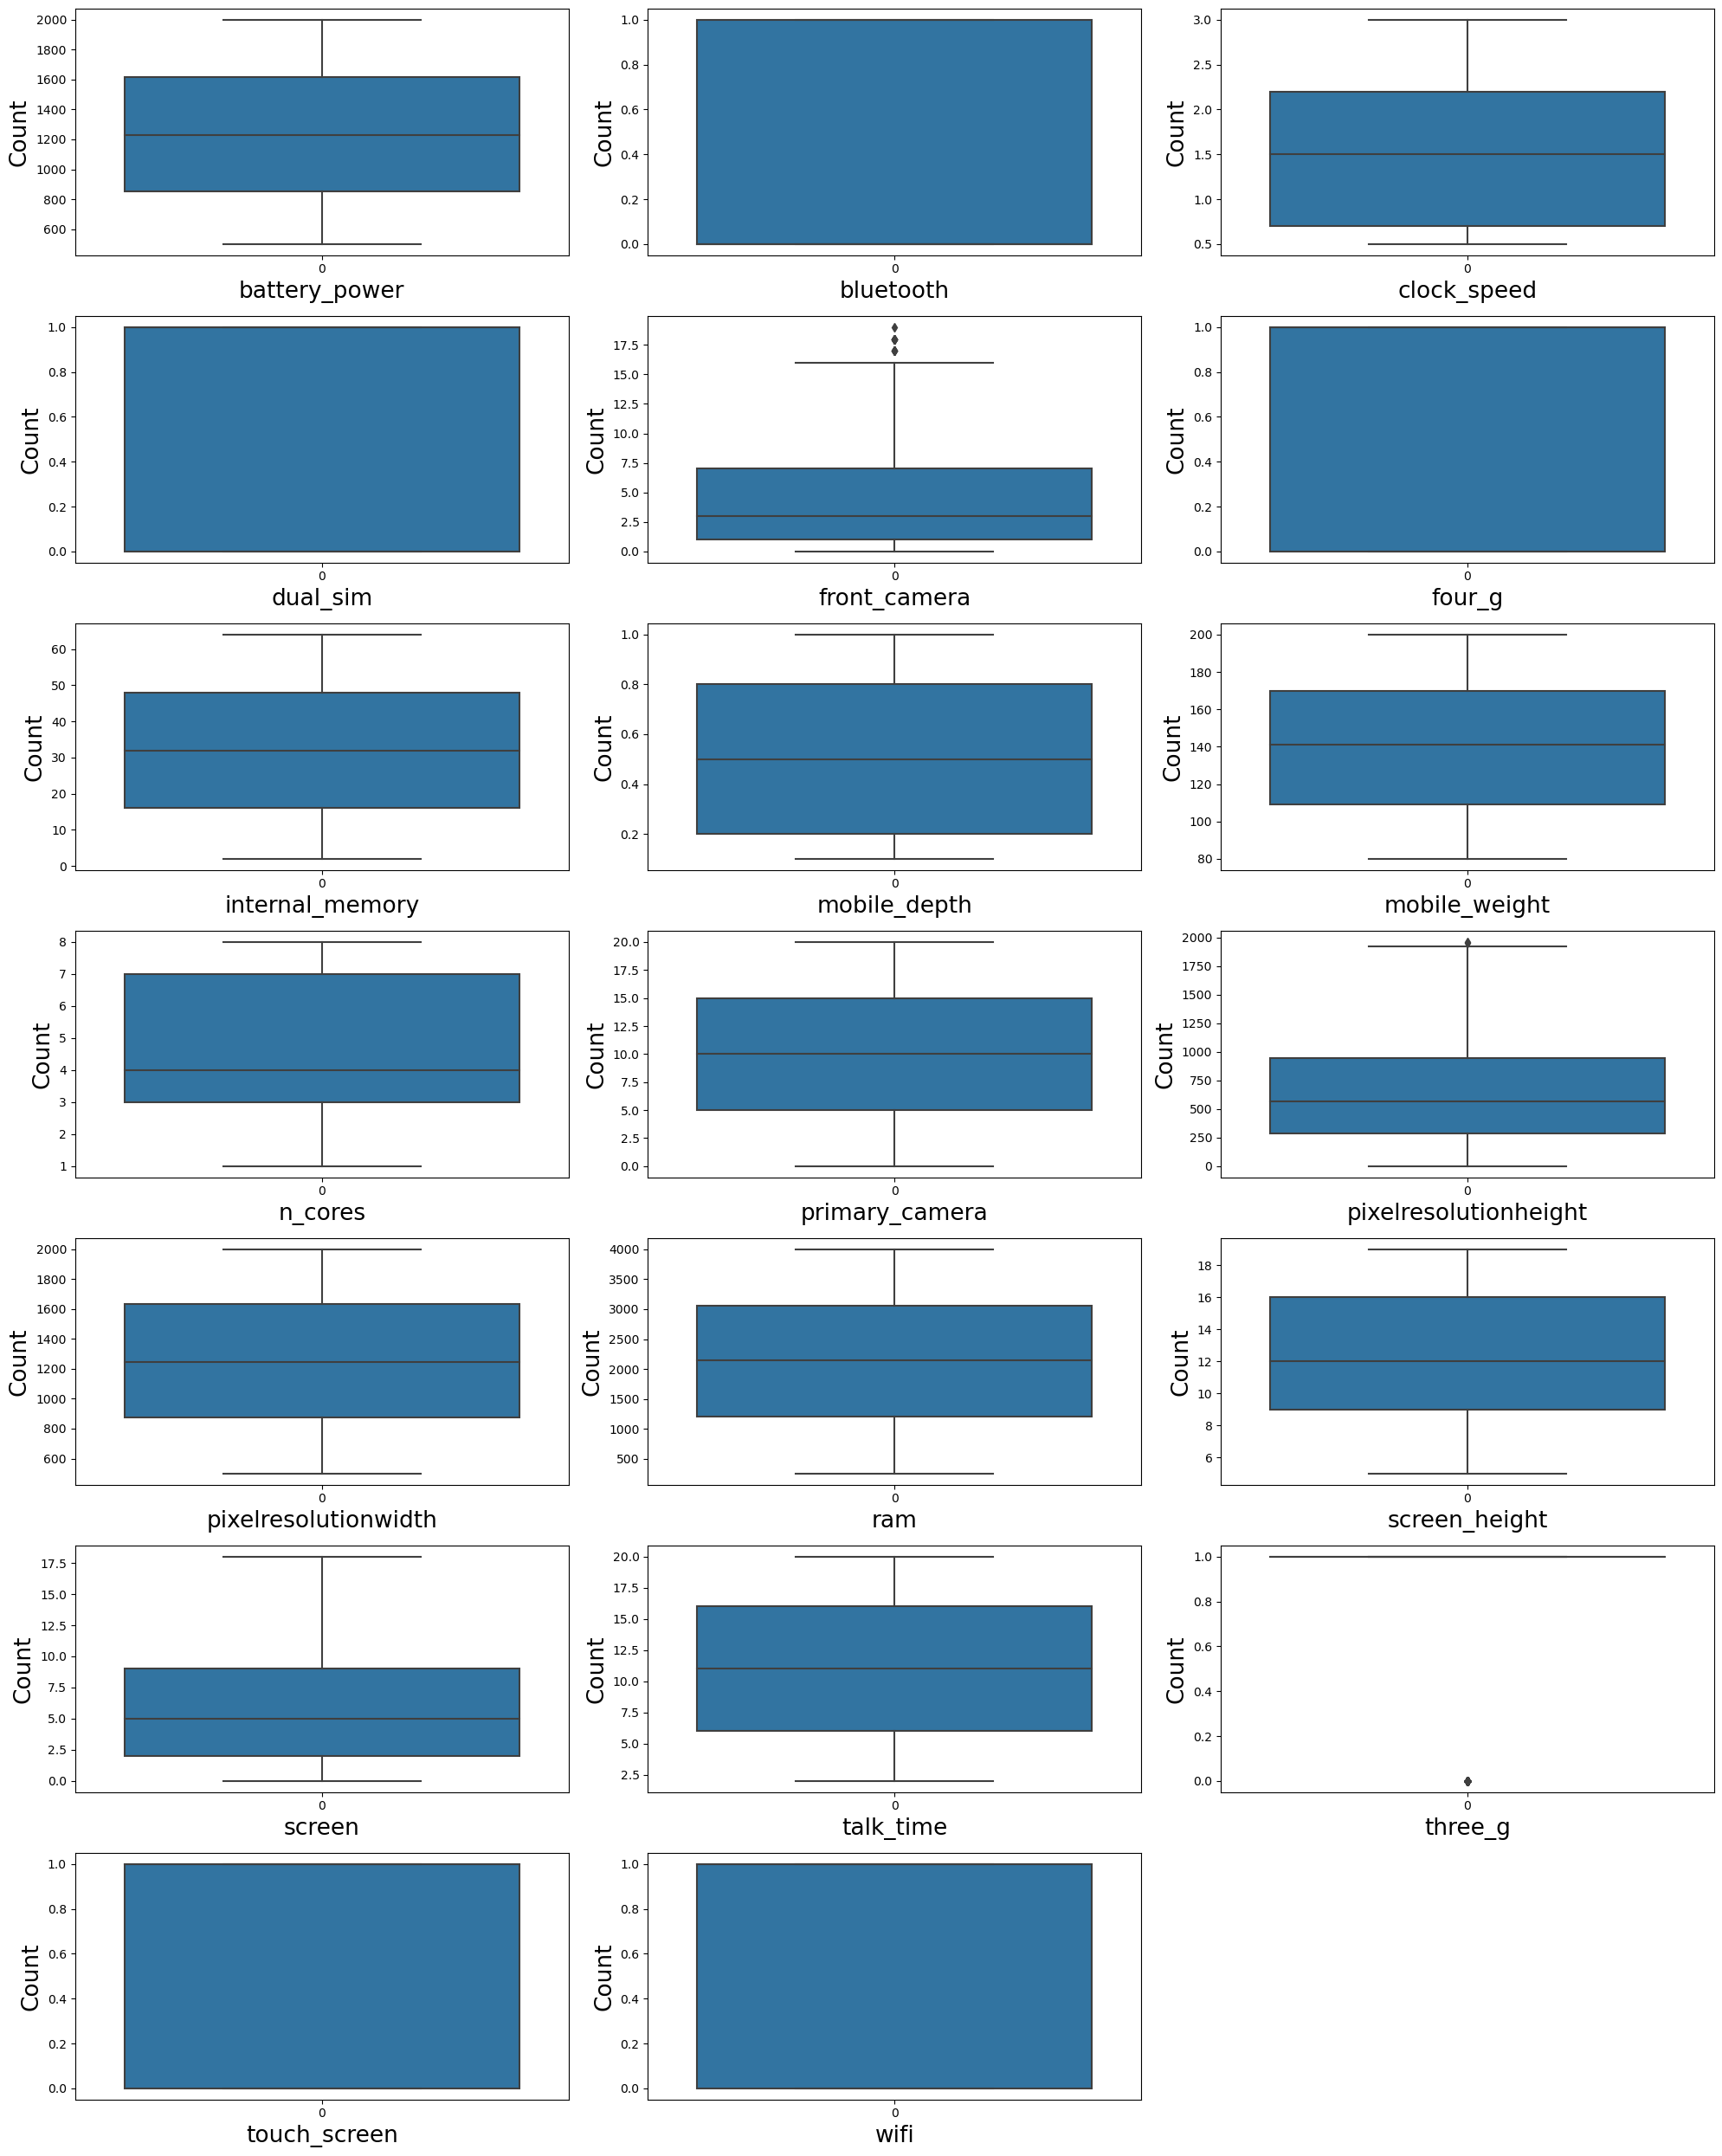

In [29]:
# Check for the outliers
plt.figure(figsize=(20,25))
pltnum=1
for col in data.drop(['price_range'],axis=1):
    axx=plt.subplot(7,3,pltnum)
    sns.boxplot(data[col])
    plt.xlabel(col,fontsize=19)
    plt.ylabel('Count',fontsize=19)
    pltnum+=1
plt.tight_layout()

In [30]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,...,pixelresolutionheight,pixelresolutionwidth,ram,screen_height,screen,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [31]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [32]:
data.columns


Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'internal_memory', 'mobile_depth', 'mobile_weight', 'n_cores',
       'primary_camera', 'pixelresolutionheight', 'pixelresolutionwidth',
       'ram', 'screen_height', 'screen', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [33]:
data[['battery_power','clock_speed','internal_memory','mobile_weight','pixelresolutionheight','pixelresolutionwidth','ram']]=sc.fit_transform(data[['battery_power','clock_speed','internal_memory','mobile_weight','pixelresolutionheight','pixelresolutionwidth','ram']])

In [35]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,...,pixelresolutionheight,pixelresolutionwidth,ram,screen_height,screen,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,1,0,0.080645,0.6,0.900000,2,...,0.010204,0.170895,0.612774,9,7,19,0,0,1,1
1,0.347361,1,0.00,1,0,1,0.822581,0.7,0.466667,3,...,0.461735,0.993324,0.634687,17,3,7,1,1,0,2
2,0.041416,1,0.00,1,2,1,0.629032,0.9,0.541667,5,...,0.644388,0.811749,0.627205,11,2,9,1,1,0,2
3,0.076152,1,0.80,0,0,0,0.129032,0.8,0.425000,6,...,0.620408,0.858478,0.671566,16,8,11,1,0,0,2
4,0.881764,1,0.28,0,13,1,0.677419,0.6,0.508333,2,...,0.616327,0.475300,0.308658,8,2,15,1,1,0,1


# 6] Feature Selection

<Axes: >

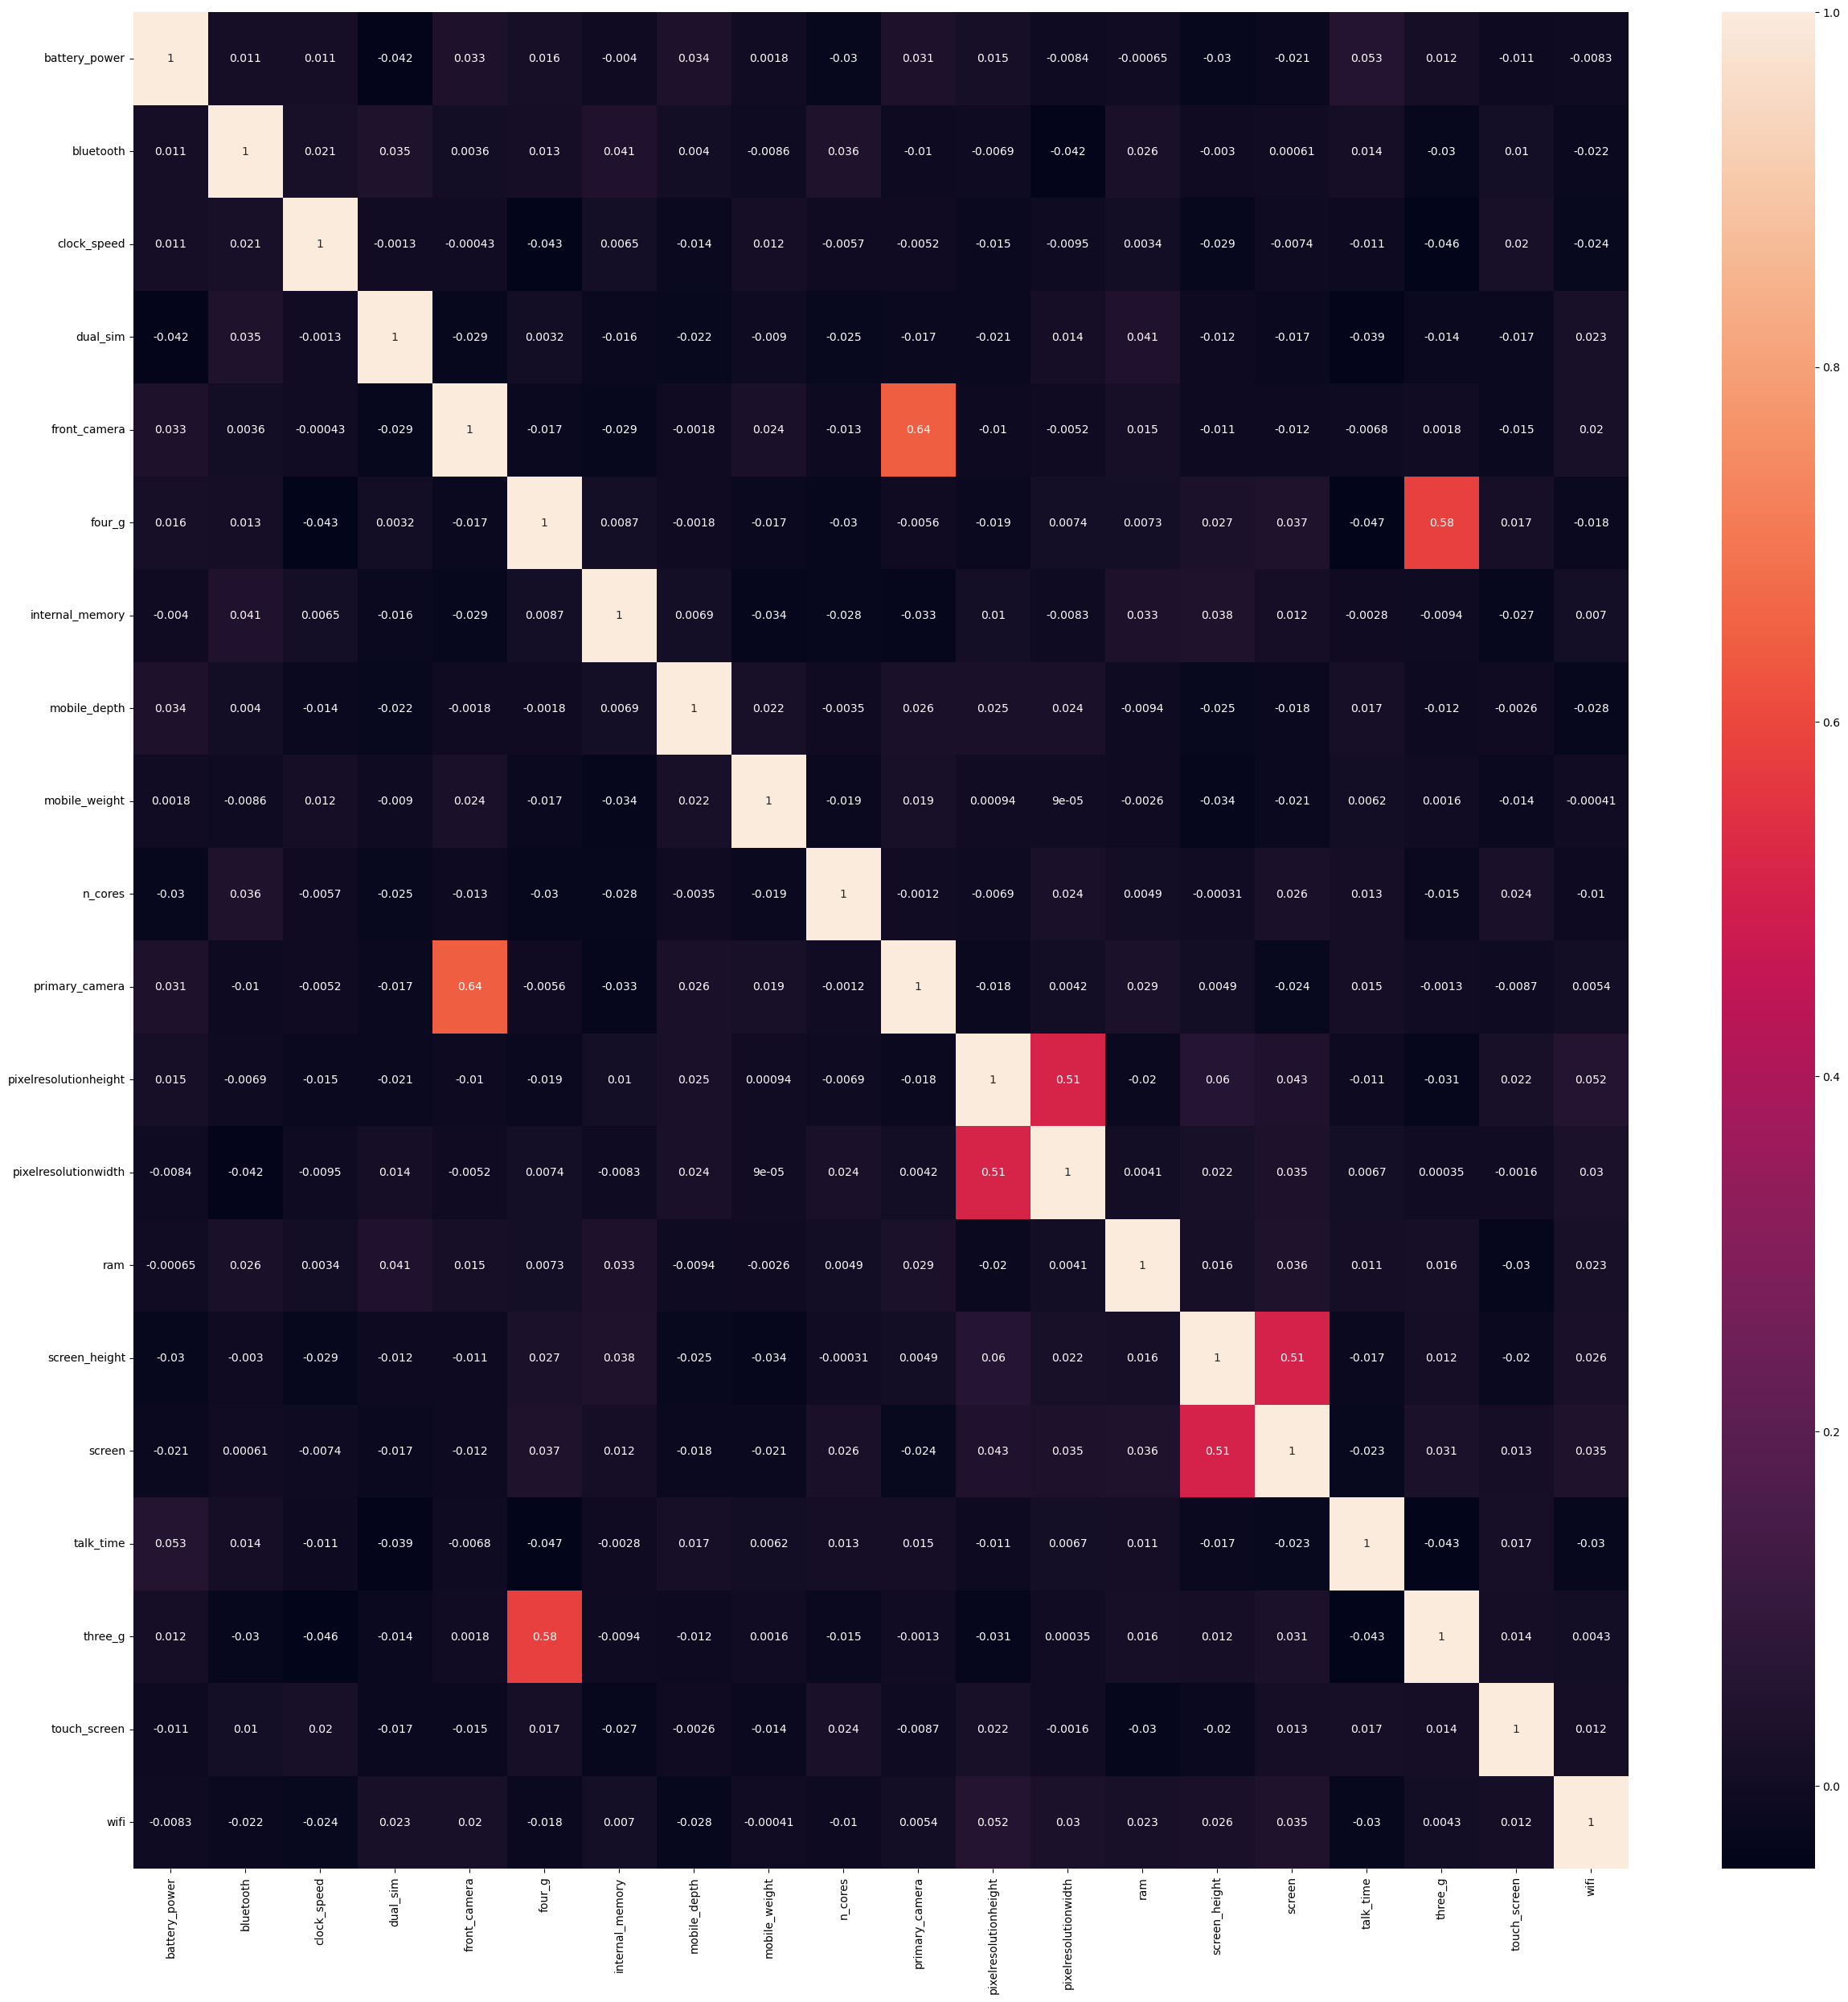

In [36]:
plt.figure(figsize=(30,30))
sns.heatmap(data.drop(['price_range'],axis=1).corr(),annot=True)

# 7] Model selection

In [37]:
x=data.drop(['price_range'],axis=1)
y=data['price_range']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [39]:
from collections import Counter

In [41]:
# Ballacning the data

In [42]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [43]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [45]:
# chekcing
print('y_train',Counter(y_train))
print('y_sm',Counter(y_sm))

y_train Counter({0: 361, 2: 351, 3: 345, 1: 343})
y_sm Counter({2: 361, 1: 361, 0: 361, 3: 361})


# 8] Model Creation and Evaluation

### 1} Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_sm,y_sm)


LogisticRegression()

In [47]:
y_pred1=model1.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred1)
recall=recall_score(y_test,y_pred1,average='weighted')
precision=precision_score(y_test,y_pred1,average='weighted')
f1score=f1_score(y_test,y_pred1,average='weighted')
accuracy=accuracy_score(y_test,y_pred1)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[127  12   0   0]
 [ 19 107  30   1]
 [  0  16 109  24]
 [  0   0  16 139]]
Recall: 0.8033333333333333
Precision: 0.8025009872032486
F1 Score: 0.8014489995108081
Accuracy: 0.8033333333333333


In [49]:
# Cross validating our accuracy score
from sklearn.model_selection import cross_val_score
print('crossvalidationscore:',cross_val_score(model1,x,y,cv=3,scoring='accuracy'))

crossvalidationscore: [0.80209895 0.77211394 0.79129129]


### 2} Suppport Vector Classifier

In [50]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(x_sm,y_sm)

SVC()

In [51]:
y_pred2=model2.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred2)
recall=recall_score(y_test,y_pred2,average='weighted')
precision=precision_score(y_test,y_pred2,average='weighted')
f1score=f1_score(y_test,y_pred2,average='weighted')
accuracy=accuracy_score(y_test,y_pred2)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[65 35 30  9]
 [54 26 48 29]
 [34 21 57 37]
 [29 21 57 48]]
Recall: 0.32666666666666666
Precision: 0.323326841636785
F1 Score: 0.31838388577103893
Accuracy: 0.32666666666666666


### 3} KNN Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_sm,y_sm)

KNeighborsClassifier()

In [58]:
y_pred3=model3.predict(x_test)

In [59]:
cm=confusion_matrix(y_test,y_pred3)
recall=recall_score(y_test,y_pred3,average='weighted')
precision=precision_score(y_test,y_pred3,average='weighted')
f1score=f1_score(y_test,y_pred3,average='weighted')
accuracy=accuracy_score(y_test,y_pred3)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[54 43 24 18]
 [53 48 28 28]
 [48 47 30 24]
 [48 52 32 23]]
Recall: 0.25833333333333336
Precision: 0.2569706450033129
F1 Score: 0.2501204846346809
Accuracy: 0.25833333333333336


### 4} Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [61]:
y_pred4=model4.predict(x_test)

In [62]:
cm=confusion_matrix(y_test,y_pred4)
recall=recall_score(y_test,y_pred4,average='weighted')
precision=precision_score(y_test,y_pred4,average='weighted')
f1score=f1_score(y_test,y_pred4,average='weighted')
accuracy=accuracy_score(y_test,y_pred4)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[123  16   0   0]
 [ 22 109  26   0]
 [  0  19 110  20]
 [  0   0  22 133]]
Recall: 0.7916666666666666
Precision: 0.7920389365200953
F1 Score: 0.7912465505167136
Accuracy: 0.7916666666666666


### 5} Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier()
model5.fit(x_sm,y_sm)


RandomForestClassifier()

In [65]:
y_pred5=model5.predict(x_test)

In [80]:
cm=confusion_matrix(y_test,y_pred5)
recall=recall_score(y_test,y_pred5,average='weighted')
precision=precision_score(y_test,y_pred5,average='weighted')
f1score=f1_score(y_test,y_pred5,average='weighted')
accuracy=accuracy_score(y_test,y_pred5)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[137   2   0   0]
 [ 12 133  12   0]
 [  0  20 121   8]
 [  0   0  13 142]]
Recall: 0.8883333333333333
Precision: 0.887901888104952
F1 Score: 0.8877566616419248
Accuracy: 0.8883333333333333


### 6} XGBoost Classifier

In [67]:
from xgboost import XGBRFClassifier
model6=XGBRFClassifier() 
model6.fit(x_sm,y_sm)


XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, reg_alpha=None, ...)

In [68]:
y_pred6=model6.predict(x_test)

In [69]:
cm=confusion_matrix(y_test,y_pred6)
recall=recall_score(y_test,y_pred6,average='weighted')
precision=precision_score(y_test,y_pred6,average='weighted')
f1score=f1_score(y_test,y_pred6,average='weighted')
accuracy=accuracy_score(y_test,y_pred6)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[129  10   0   0]
 [  9 135  13   0]
 [  0  21 115  13]
 [  0   0  11 144]]
Recall: 0.8716666666666667
Precision: 0.8717574864846124
F1 Score: 0.871290121160795
Accuracy: 0.8716666666666667


### 7} Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
model7=GradientBoostingClassifier()
model7.fit(x_sm,y_sm)


GradientBoostingClassifier()

In [73]:
y_pred7=model7.predict(x_test)

In [74]:
cm=confusion_matrix(y_test,y_pred7)
recall=recall_score(y_test,y_pred7,average='weighted')
precision=precision_score(y_test,y_pred7,average='weighted')
f1score=f1_score(y_test,y_pred7,average='weighted')
accuracy=accuracy_score(y_test,y_pred7)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[132   7   0   0]
 [  9 135  13   0]
 [  0  12 125  12]
 [  0   0   9 146]]
Recall: 0.8966666666666666
Precision: 0.8961434301295216
F1 Score: 0.8963410453887195
Accuracy: 0.8966666666666666


# Comparing all models

In [86]:
y1=[0.81,0.32,0.25,0.79,0.88,0.87,0.89]
names=['LogisticReg','SVC','KNNC','DTC','RMFC','XGBC','GBC']

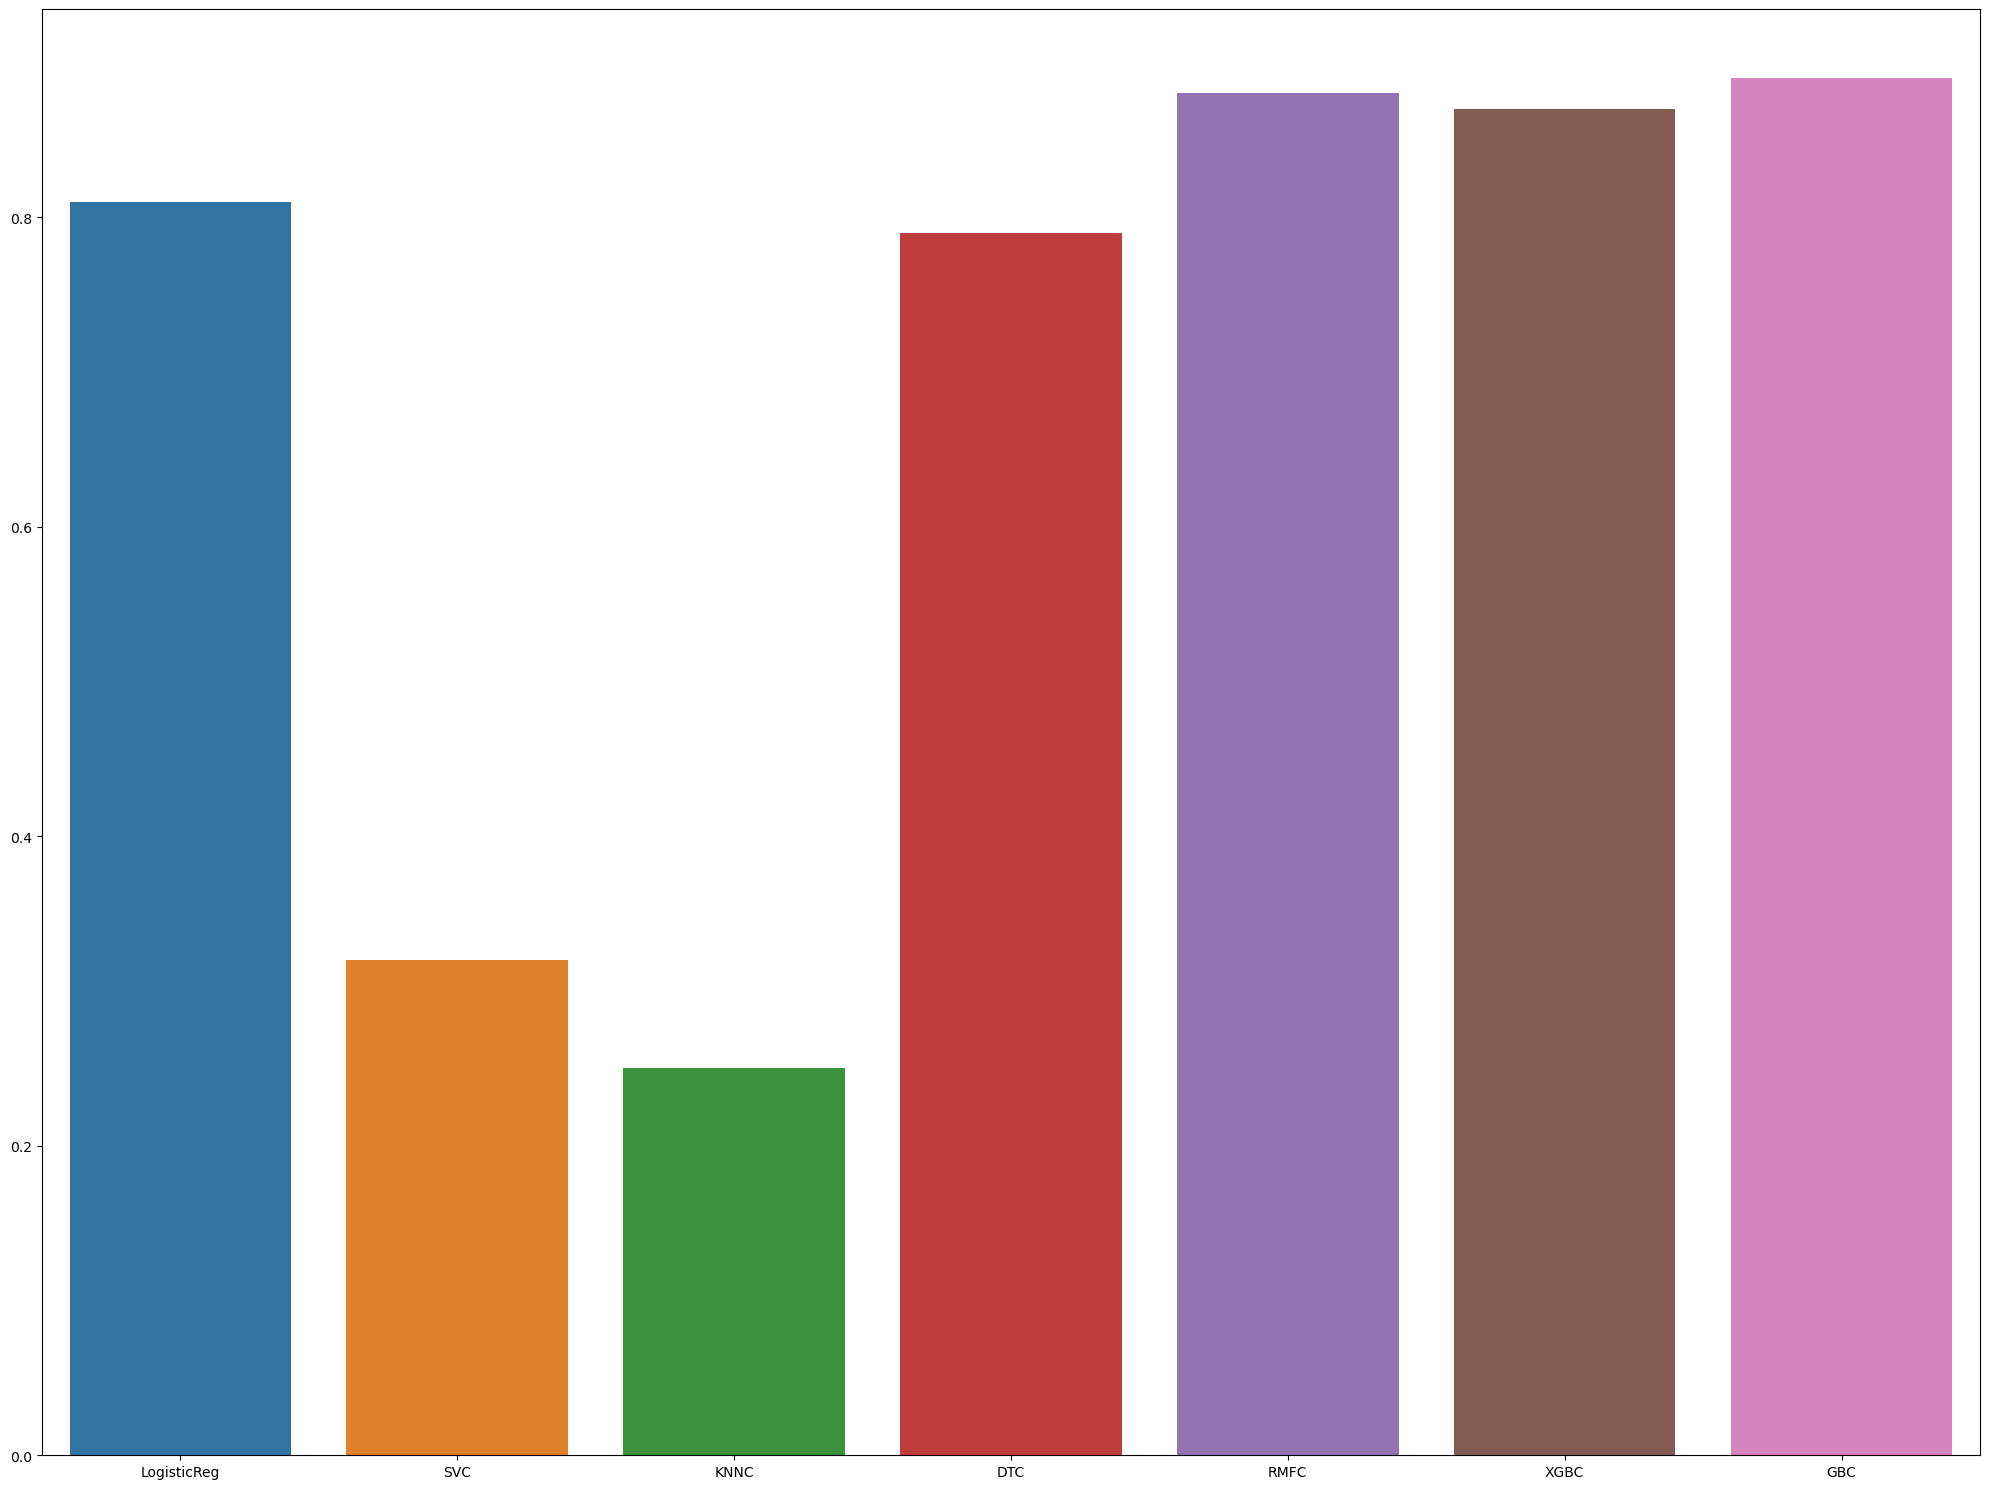

In [87]:
plt.figure(figsize=(20,15))
sns.barplot(x=names,y=y1)
plt.tight_layout()

#### we can see Gradient Boosting CLassifier perfomed best 

In [88]:
### Hyper parameter tuning on Gradient Boosting Classifier

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [92]:
gb_classifier = GradientBoostingClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train,y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [93]:
# lets see how much it can improve our model now
Gradient_classifier=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,min_samples_leaf=4,min_samples_split=2,n_estimators=100)
Gradient_classifier.fit(x_sm,y_sm)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=4)

In [94]:
y_predict=Gradient_classifier.predict(x_test)

In [95]:
cm=confusion_matrix(y_test,y_predict)
recall=recall_score(y_test,y_predict,average='weighted')
precision=precision_score(y_test,y_predict,average='weighted')
f1score=f1_score(y_test,y_predict,average='weighted')
accuracy=accuracy_score(y_test,y_predict)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[135   4   0   0]
 [  8 137  12   0]
 [  0  13 126  10]
 [  0   0   8 147]]
Recall: 0.9083333333333333
Precision: 0.9076817283725496
F1 Score: 0.9079094967187241
Accuracy: 0.9083333333333333


In [96]:
# woh we can see hyper parmeter tuning increased our result by 1 percnt

#### Finalizing the algorithm
So we are choosing the GradientBoostiing Classifier algorithm which is Gradient_classifier

In [104]:
import pickle as pkl
pkl.dump(Gradient_classifier,open("mobile.pkl","wb"))
read=pkl.load(open("mobile.pkl","rb"))

In [ ]:
## checking model how it works

In [106]:
independent_input_data=[0.9,1,1.5,0,11,1,44,0.6,141,2,14,0.61,0.47,0.30,8,2,15,1,1,0]
e=read.predict([independent_input_data])[0]
print(e,"\n")
if e<=0.99:
    print("the mobile range is LOW PRICE.")
elif e<=1.99:
    print("the mobile range is MEDIUM PRICE.")
elif e<=2.99:
    print("the mobile range is HIGH PRICE.")
elif e<=3:
    print("the mobile range is VERY HIGH PRICE.")

1 

the mobile range is MEDIUM PRICE.


In [110]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_camera,pixelresolutionheight,pixelresolutionwidth,ram,screen_height,screen,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,1,0,0.080645,0.6,0.900000,2,2,0.010204,0.170895,0.612774,9,7,19,0,0,1,1
1,0.347361,1,0.00,1,0,1,0.822581,0.7,0.466667,3,6,0.461735,0.993324,0.634687,17,3,7,1,1,0,2
2,0.041416,1,0.00,1,2,1,0.629032,0.9,0.541667,5,6,0.644388,0.811749,0.627205,11,2,9,1,1,0,2
3,0.076152,1,0.80,0,0,0,0.129032,0.8,0.425000,6,9,0.620408,0.858478,0.671566,16,8,11,1,0,0,2
4,0.881764,1,0.28,0,13,1,0.677419,0.6,0.508333,2,14,0.616327,0.475300,0.308658,8,2,15,1,1,0,1


In [111]:
independent_input_data=[0.347361,1,0.00,1,0,1,0.82,0.7,0.46,3,6,0.46,0.99,0.63,17,3,7,1,1,0]
e=read.predict([independent_input_data])[0]
print(e,"\n")
if e<=0.99:
    print("the mobile range is LOW PRICE.")
elif e<=1.99:
    print("the mobile range is MEDIUM PRICE.")
elif e<=2.99:
    print("the mobile range is HIGH PRICE.")
elif e<=3:
    print("the mobile range is VERY HIGH PRICE.")

2 

the mobile range is HIGH PRICE.


In [109]:
pd.set_option('display.max_columns', None)